In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#https://www.kaggle.com/competitions/digit-recognizer/overview

In [9]:
df = pd.read_csv('/content/train.csv')

In [10]:
df.shape

(42000, 785)

In [11]:
y_train = df.label
x_train = df.drop(['label'],axis=1)
x_train = x_train.values
x_train = x_train.reshape(42000, 28, 28)
x_train = np.expand_dims(x_train,axis=-1)

In [12]:
x_train.shape

(42000, 28, 28, 1)

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks= tf.keras.callbacks.EarlyStopping(verbose=1,patience=5)

model.fit(x_train/255,y_train,epochs=20,validation_split=0.2,callbacks=callbacks)

Epoch 1/20
1050/1050 [==============================] - 7s 5ms/step - loss: 0.1892 - accuracy: 0.9421 - val_loss: 0.0892 - val_accuracy: 0.9717
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0366 - accuracy: 0.9878 - val_loss: 0.0453 - val_accuracy: 0.9864
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0447 - val_accuracy: 0.9874
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0575 - val_accuracy: 0.9838
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0190 - accuracy: 0.9930 - val_loss: 0.0554 - val_accuracy: 0.9839
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0548 - val_accuracy:

In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 100)       1000      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 50)        45050     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 50)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 1250)              0         
                                                                 
 dense_14 (Dense)            (None, 100)              

In [25]:
df_test = pd.read_csv('/content/test.csv')
x_test = df_test.values
x_test = x_test.reshape(-1, 28, 28)
x_test = np.expand_dims(x_test,axis=-1)

In [27]:
x_test.shape

(28000, 28, 28, 1)

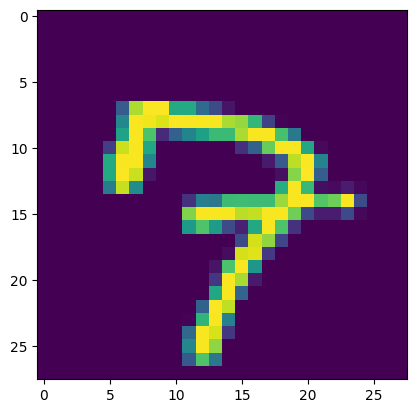

In [50]:
plt.imshow(x_test[5,:,:,0])

In [40]:
result = model.predict(x_test/255)

875/875 [==============================] - 2s 2ms/step


In [41]:
result.shape

(28000, 10)

In [44]:
max_res = []
for res in result:
  max_res.append(np.argmax(res))

In [49]:
max_res[5]

7

In [56]:
df_res = pd.DataFrame(max_res,columns=['Label'])

In [57]:
df_res

,Label
0,2
1,0
2,9
3,0
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [64]:
df_res = df_res.set_index(np.arange(1,28001,1))

In [67]:
df_res.to_csv('/content/result.csv')